<a href="https://colab.research.google.com/github/luciansantana/covid19/blob/master/Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [70]:
covid = pd.read_excel("https://github.com/luciansantana/covid19/blob/master/HIST_PAINEL_COVIDBR_22jun2020.xlsx?raw=true")

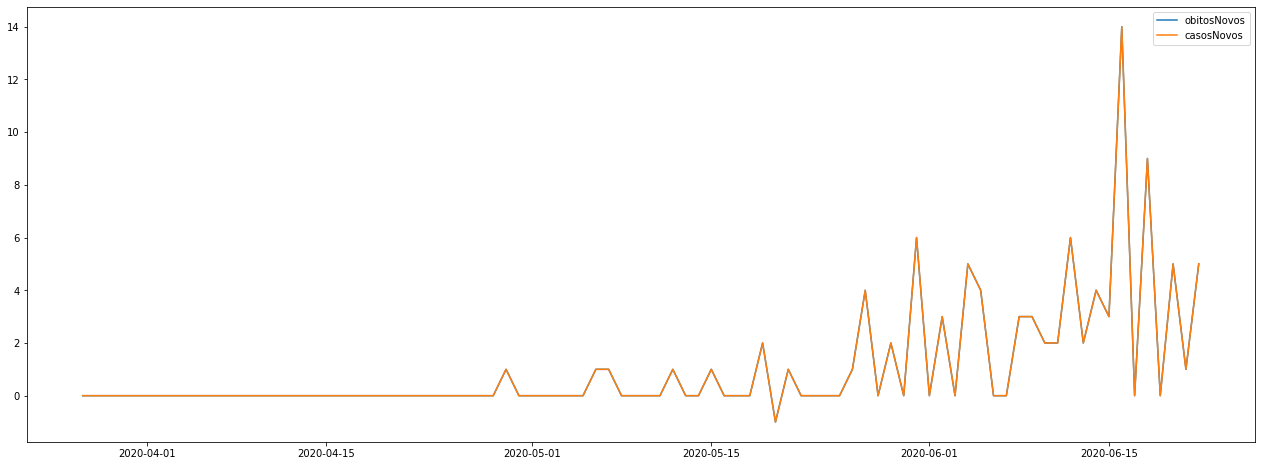

In [179]:
bahia_covid = covid[covid['estado']=='BA']
salvador_covid = bahia_covid[bahia_covid['municipio']=='Santo Amaro']
salvador_covid = salvador_covid.set_index(['data'])
obitos = ['obitosAcumulado','obitosNovos']
casos = ['casosAcumulado','casosNovos']
acumulado = ['obitosAcumulado','casosAcumulado']
novos = ['obitosNovos','casosNovos']
plt.figure(figsize=(22,8))
for i in novos:
  plt.plot(salvador_covid['casosNovos'],label = i)
  plt.legend()

In [177]:
salvador_covid = bahia_covid[bahia_covid['municipio']=='Santo Amaro']
salvador_covid['casosAcumulado']

187340     0
187341     0
187342     0
187343     0
187344     0
          ..
187423    80
187424    80
187425    85
187426    86
187427    91
Name: casosAcumulado, Length: 88, dtype: int64

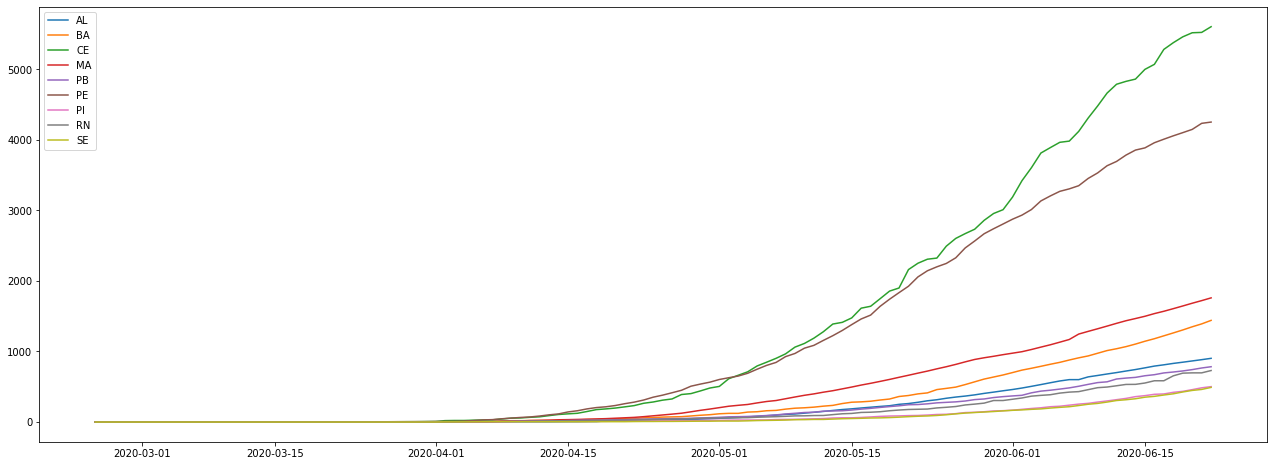

In [222]:
cod_0 = covid[covid['regiao']=='Nordeste']
cod0 = cod_0.dropna(subset = ['estado'])
cod1 = sorted(cod0['estado'].unique())
plt.figure(figsize=(22,8))
for i in cod1:
  estado_covid = covid[covid['estado']==i]
  teste = estado_covid[estado_covid['municipio'].isnull()]
  teste = teste.dropna(subset = ['populacaoTCU2019'])
  teste = teste.set_index(['data'])
  plt.plot(teste['obitosAcumulado'],label = i)
  plt.legend()

In [218]:
estado

'RJ'

In [206]:
teste = bahia_covid[bahia_covid['municipio'].isnull()]
teste = teste.dropna(subset = ['populacaoTCU2019'])


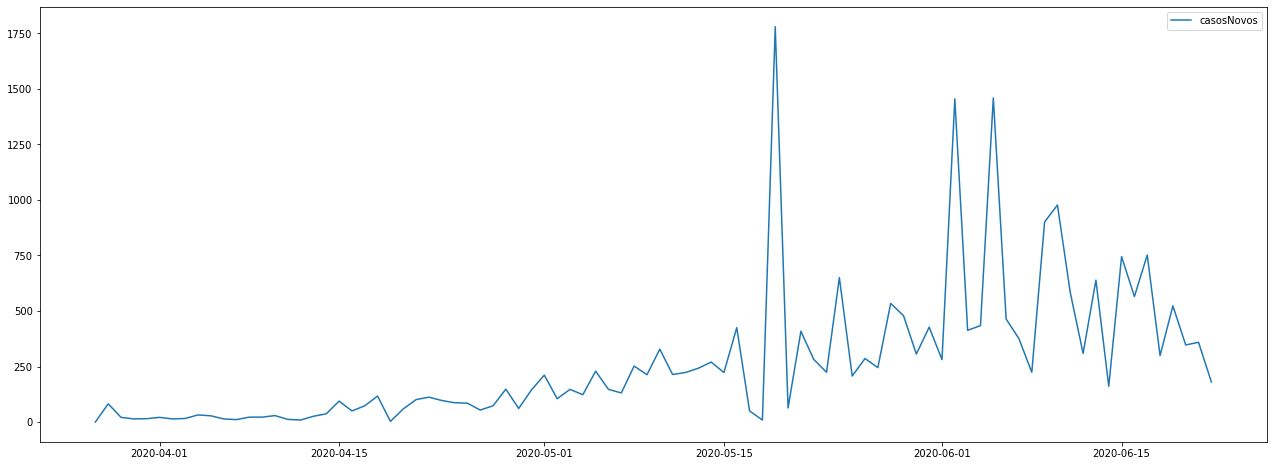

In [161]:
plt.figure(figsize=(22,8))
plt.plot(salvador_covid['casosNovos'],label = i)
plt.legend()